In [1]:
import datetime

from db import DB
db = DB()

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('fivethirtyeight') # fivethirtyeight, fast
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # font to handle chinese
%matplotlib inline

In [3]:
import prep_download
import prep_parse

from_date = '2019-10'
prep_download.download_all(db, from_date)
prep_parse.parse_all(db, from_date)

download_weekly_shareholder_classes 2301 20191101


In [6]:
import datetime
import prep_parse
prep_parse.parse_weekly_shareholder_classes('2301', datetime.date(2019,11,1), db)

parse_weekly_shareholder_classes 2301 2019-11-01


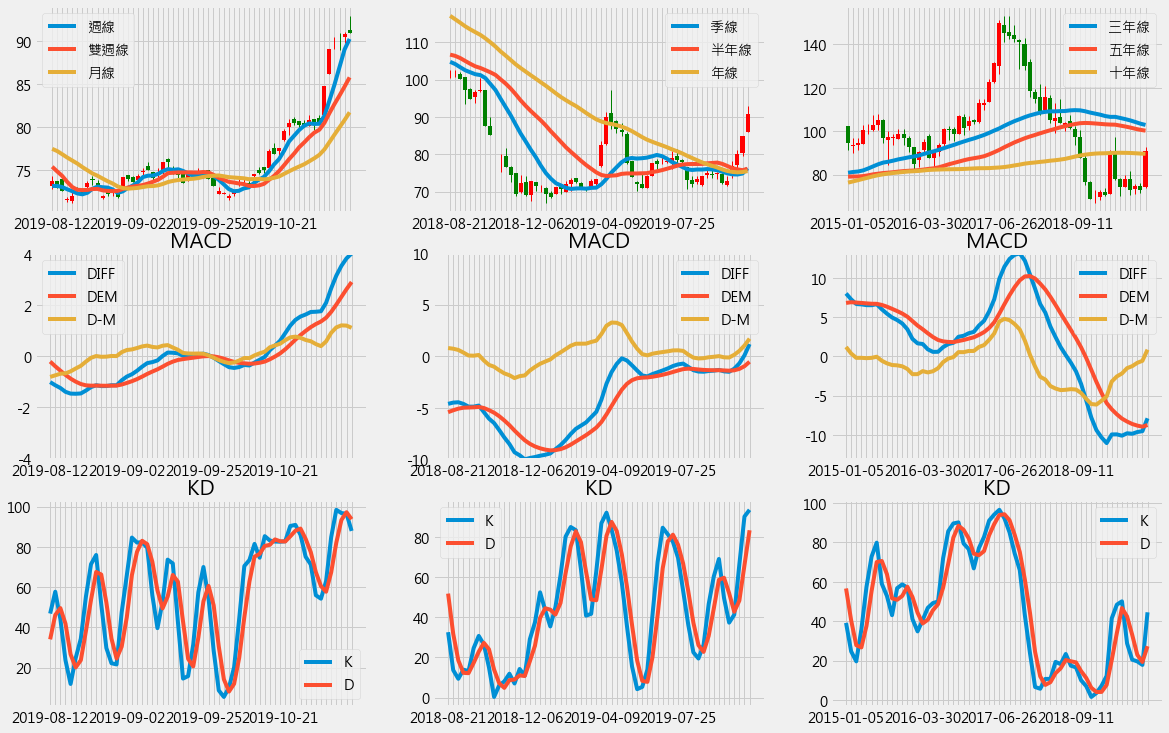

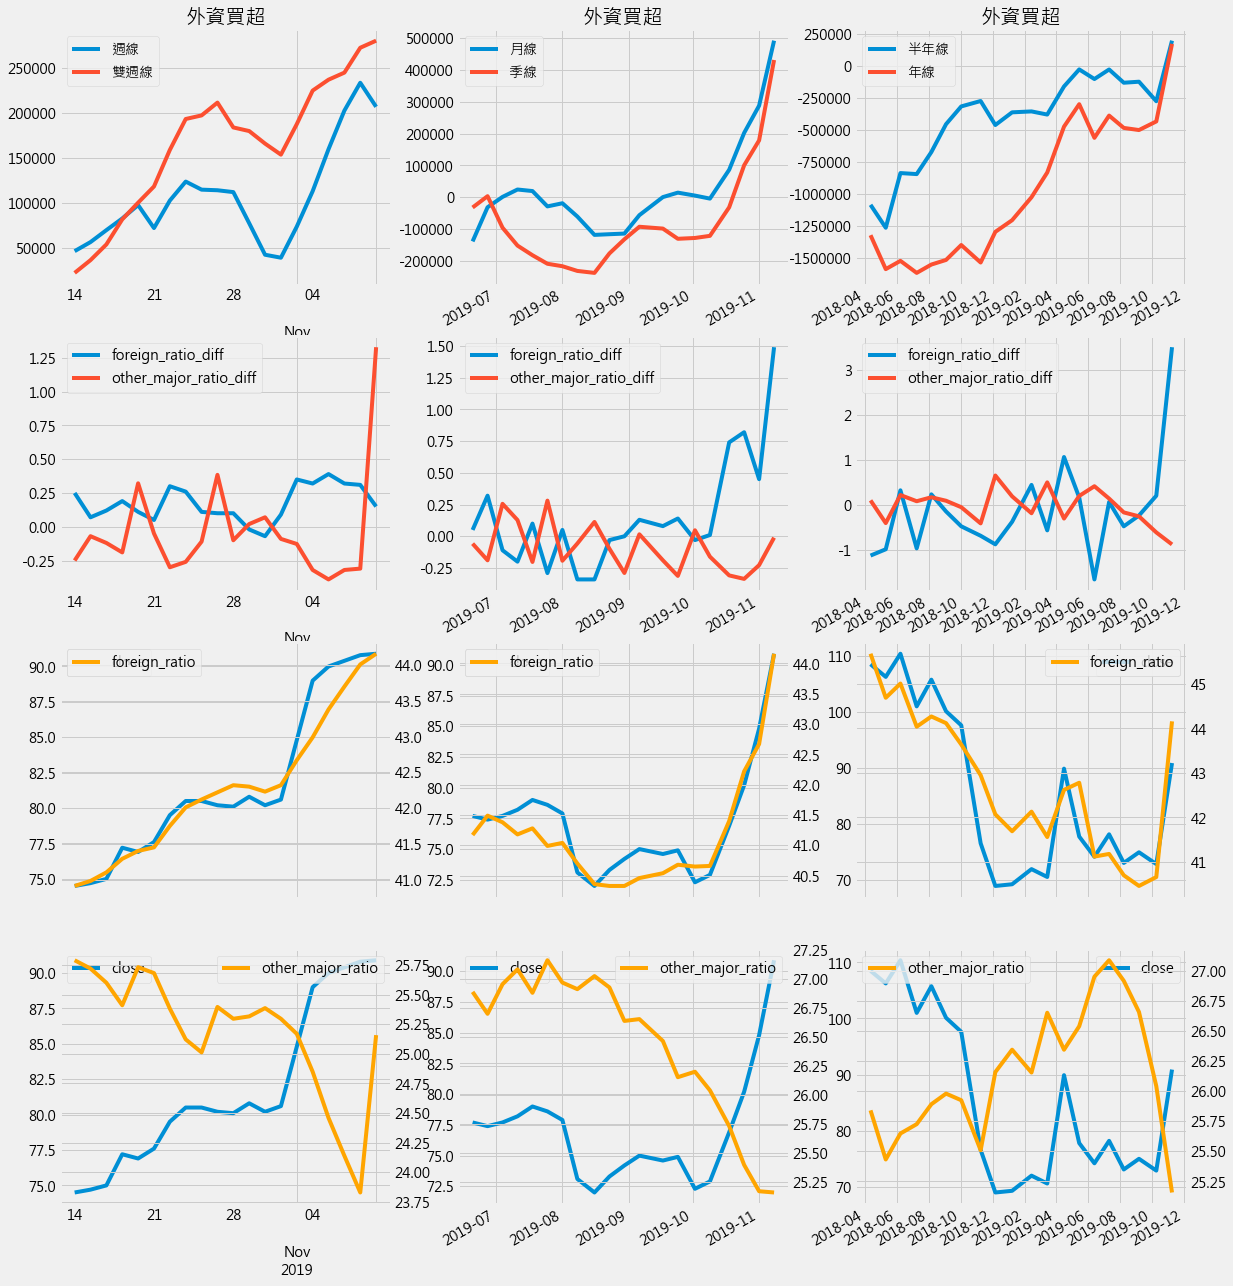

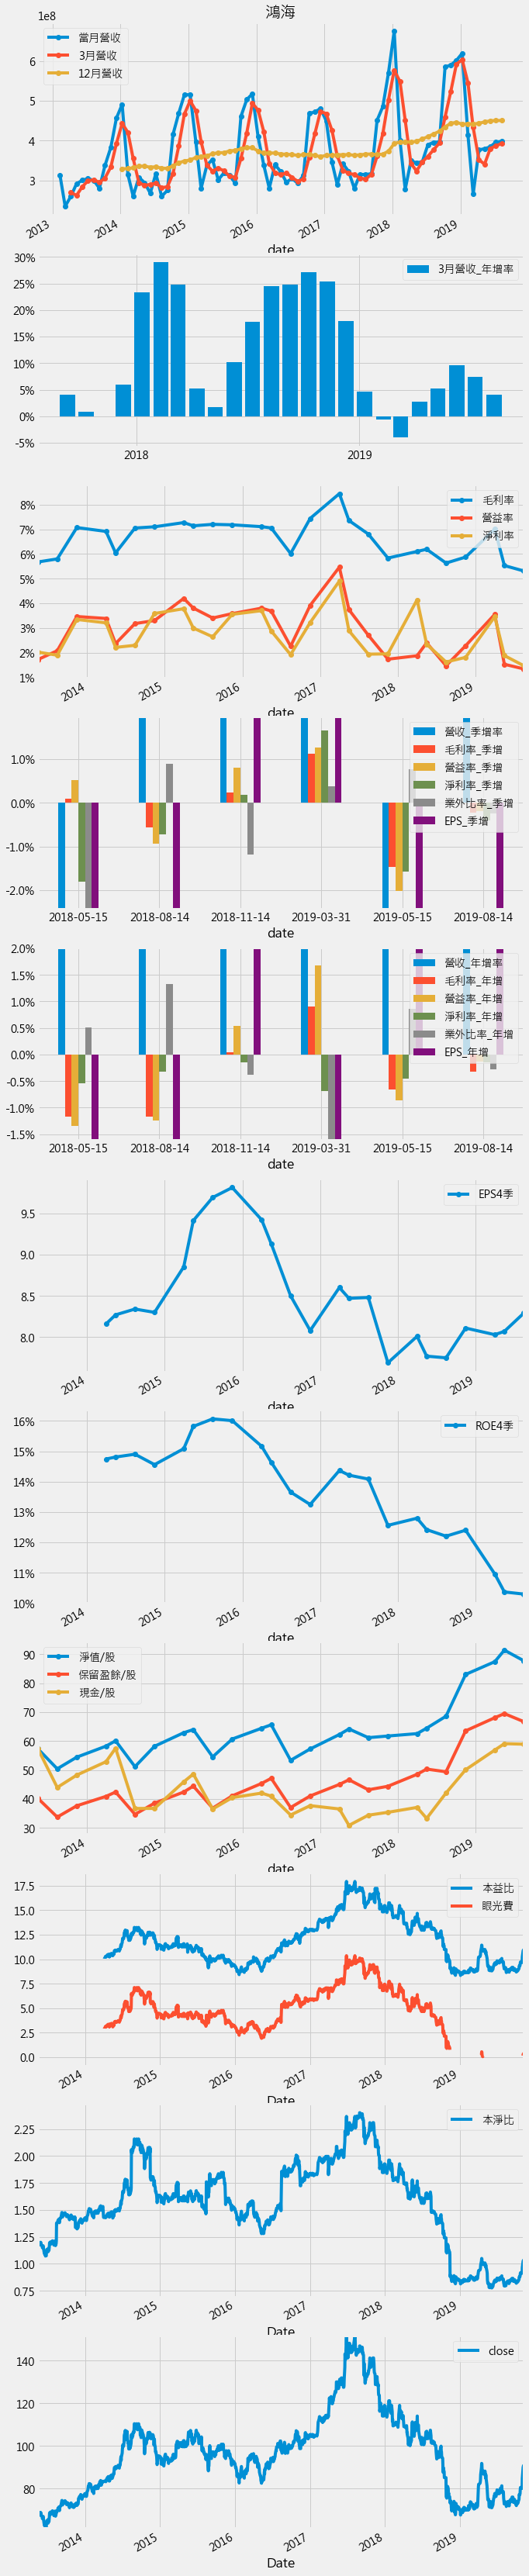

In [3]:
from analysis_fundamental import dashboard as fundamental
from analysis_technical import dashboard as technical
from analysis_chip import dashboard as chip

stock_id = '2317'
technical(stock_id, db)
chip(stock_id, db, 20)
fundamental(stock_id, db)

In [4]:
import strategy
stock_info = db.get_stock_info()[['stock_name', 'industry']]
stock_data = strategy.prepare_stock_data(db)

In [5]:
stock_info.shape

(24, 2)

In [7]:
date = datetime.date(2019,11,8) # modify
df = strategy.get_stock_data_by_date(stock_info, stock_data, date)
df[ (df['EPS4季'] > 1) & (df['本益比'] < 10) & (df['眼光費'] < 0) ] # modify

,stock_name,industry,close,淨值/股,EPS4季,本益比,本淨比,眼光費
1434,福懋,紡織纖維,34.45,40.62,3.48,9.9,0.85,-1.77


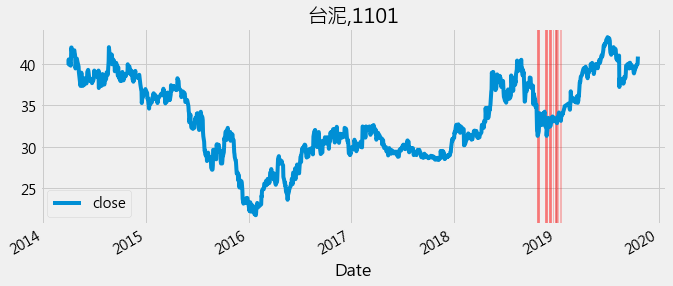

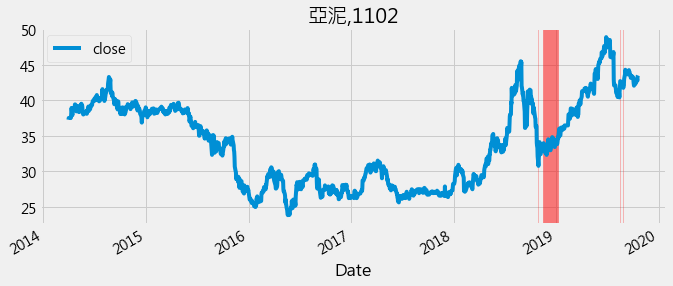

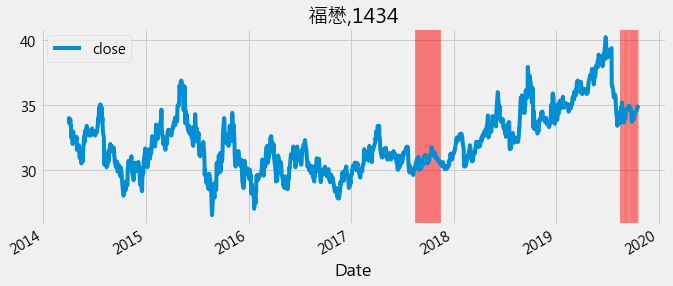

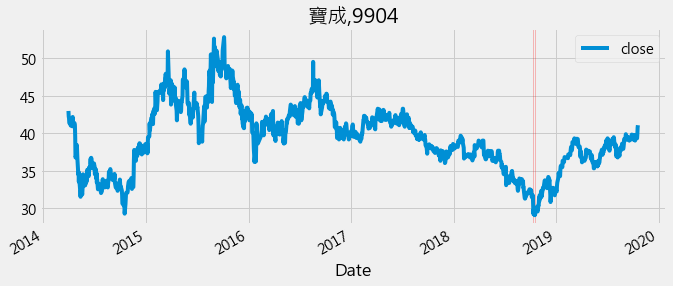

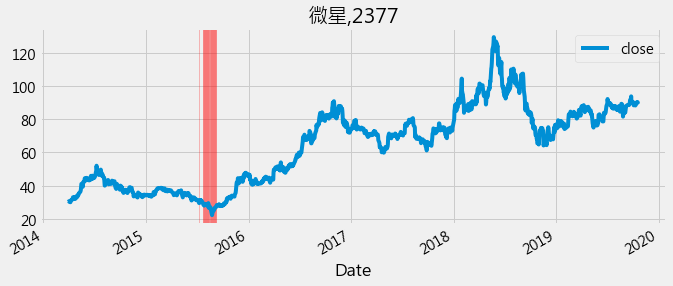

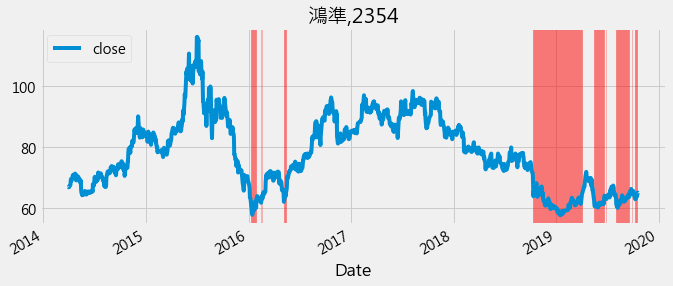

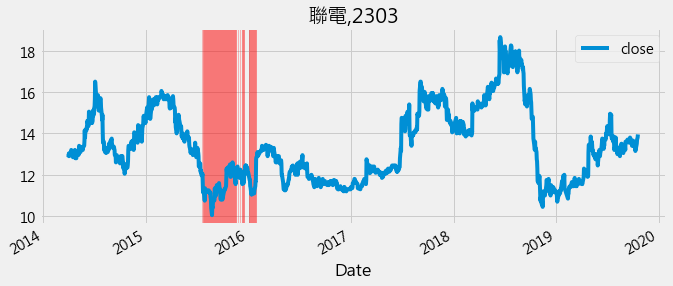

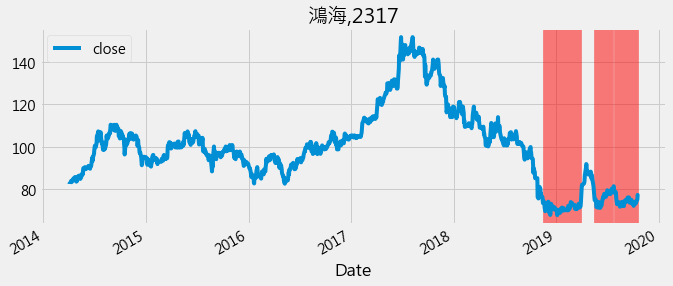

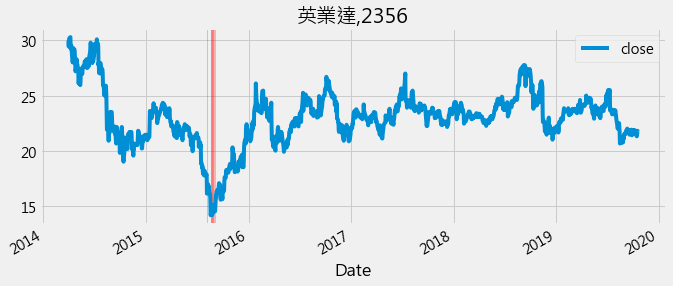

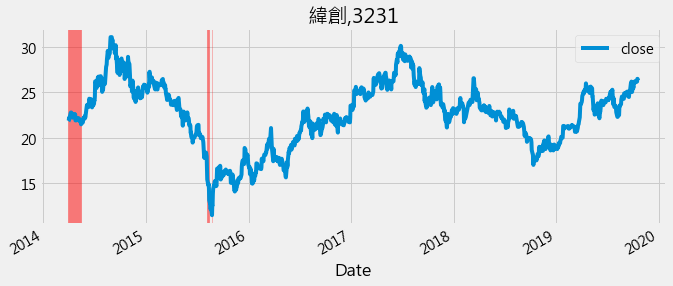

In [6]:
def backtest(stock_info, stock_data):
    for stock_id in stock_info.index:
        stock_name = stock_info.loc[stock_id, 'stock_name'] + ',' + stock_id
        df_daily = stock_data[stock_id]
        region = []
        get = False
        for i in range(len(df_daily.index)):
            if df_daily.iloc[i]['EPS4季'] > 1 and df_daily.iloc[i]['本益比'] < 10 and df_daily.iloc[i]['眼光費'] < 0:
                if not get:
                    region.append([df_daily.index[i]])
                    get = True
                continue
            if get:
                region[-1].append(df_daily.index[i - 1])
                get = False

        if len(region) > 0:
            if len(region[-1]) == 1:
                region[-1].append(df_daily.index[-1])
            ax = df_daily[['close']].plot(grid=True, title=stock_name, figsize=(10,4))
            for xmin, xmax in region:
                ax.axvspan(xmin, xmax, color='red', alpha=0.5)

backtest(stock_info, stock_data)